In [294]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy import misc
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [295]:
sns.set_style("white")
wine = pd.read_csv("wine.csv")
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [296]:
## Checking if there any NAN on the dataset.
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [297]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [298]:
## renaming columns with _ for similarity looks.
wine.rename(columns={'free_sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)

In [299]:
## Creating a rating quality, if < 5, quality is bad, >= 4 quality is good. 0 represent bad, 1 represent good.
wine["quality_rating"] = wine['quality'].apply(lambda x: 0 if x <= 5 else 1)
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


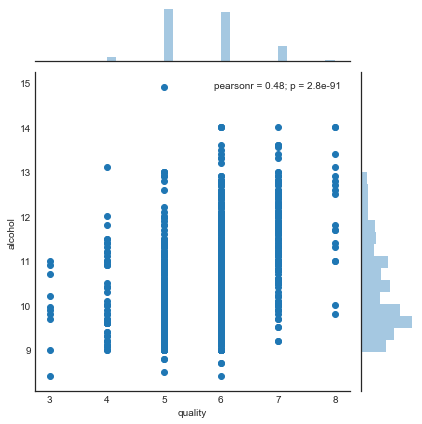

In [300]:
## We are comparing alcohol level against quality. We can see that higher alcohol level does not necessary mean higher quality 
## of the alcohol. Alcohol level around 9 to 13 is very popular. Even though they quality is not high, but maybe their price
## is affordable, thus, more people buying average quality against the price. 
## Most people buy wine that have quality of 6, but overall, quality of 5, 6 and 7 are the most popular.
sns.jointplot(data=wine,x='quality',y='alcohol')

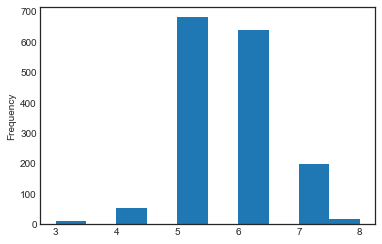

In [301]:
## better visual to see how popular each quality is.
wine['quality'].plot.hist()

In [302]:
## sns.pairplot(wine,hue='quality_rating',palette='coolwarm')

## Linear Regression

In [303]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_rating'],
      dtype='object')

In [304]:
X = wine.drop('quality_rating',axis=1)

In [305]:
y = wine['quality_rating']

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [307]:
from sklearn.linear_model import LinearRegression

In [308]:
lm = LinearRegression()

In [309]:
model = lm.fit(X_train,y_train)

In [310]:
predictions = lm.predict(X_test)

In [357]:
model.score(X_test,y_test)

0.7193072702577665

In [359]:
## Can use r2_score to find the prediction value for Linear Regression. 

In [355]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.7193072702577665

## KNN Classification

In [312]:
from sklearn.neighbors import KNeighborsClassifier

In [313]:
knn = KNeighborsClassifier(n_neighbors=1)

In [314]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [315]:
pred = knn.predict(X_test)

In [316]:
from sklearn.metrics import classification_report,confusion_matrix

In [317]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.83      0.80      0.81       232
          1       0.82      0.84      0.83       248

avg / total       0.82      0.82      0.82       480



[[185  47]
 [ 39 209]]


In [318]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

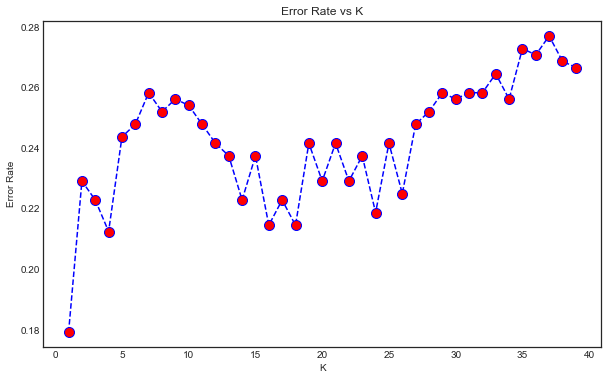

In [319]:
## We can see that using K value as 1 give us the highest accuracy rate. The higher the K value, the less accuracy we have.
## Example: k = 15 gives 76% and k = 18 gives 79%.
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Logistic Regression

In [320]:
from sklearn.linear_model import LogisticRegression

In [321]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [322]:
predictionss = logmodel.predict(X_test)

In [323]:
print(classification_report(y_test,predictionss))
print('\n')
print(confusion_matrix(y_test,predictionss))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       232
          1       1.00      1.00      1.00       248

avg / total       1.00      1.00      1.00       480



[[232   0]
 [  0 248]]


## Decision Tree and Random Forest

In [324]:
from sklearn.tree import DecisionTreeClassifier

In [325]:
dtree = DecisionTreeClassifier()

In [326]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [327]:
predictionsss = dtree.predict(X_test)

In [328]:
print(classification_report(y_test,predictionsss))
print('\n')
print(confusion_matrix(y_test,predictionsss))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       232
          1       1.00      1.00      1.00       248

avg / total       1.00      1.00      1.00       480



[[232   0]
 [  0 248]]


In [329]:
from sklearn.ensemble import RandomForestClassifier

In [330]:
rfc = RandomForestClassifier(n_estimators=300)

In [331]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [332]:
predictionssss = rfc.predict(X_test)

In [333]:
print(classification_report(y_test,predictionssss))
print('\n')
print(confusion_matrix(y_test,predictionssss))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       232
          1       1.00      1.00      1.00       248

avg / total       1.00      1.00      1.00       480



[[232   0]
 [  0 248]]


## SVM 

In [334]:
from sklearn.svm import SVC

In [335]:
svc_model = SVC()

In [336]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [337]:
predictionsssss = svc_model.predict(X_test)

In [338]:
print(classification_report(y_test,predictionsssss))
print('\n')
print(confusion_matrix(y_test,predictionsssss))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88       232
          1       0.89      0.89      0.89       248

avg / total       0.89      0.89      0.89       480



[[204  28]
 [ 27 221]]


## GridSearch

In [339]:
from sklearn.grid_search import GridSearchCV

In [340]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [341]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......................................... C=0.1, gamma=1 -   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................................... C=0.1, gamma=0.01 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...................................... C=0.1, gamma=0.01 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    8.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [342]:
grid_predictions = grid.predict(X_test)

In [343]:
print(classification_report(y_test,grid_predictions))
print('\n')
print(confusion_matrix(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       232
          1       1.00      1.00      1.00       248

avg / total       1.00      1.00      1.00       480



[[232   0]
 [  0 248]]


In [344]:
grid.best_params_

{'C': 100, 'gamma': 0.001}

In [345]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Gradient Boost

In [346]:
from sklearn.ensemble import GradientBoostingClassifier

In [347]:
clf = GradientBoostingClassifier(n_estimators=100)

In [348]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [349]:
predictionssssss = clf.predict(X_test)

In [350]:
print(classification_report(y_test,predictionssssss))
print('\n')
print(confusion_matrix(y_test,predictionssssss))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       232
          1       1.00      1.00      1.00       248

avg / total       1.00      1.00      1.00       480



[[232   0]
 [  0 248]]


There were 4 that have an accuracy of 100%, which are Decision Trees, Random Forest, SVM GridSearch, and Gradient Boost.
There lowest classfication models are Linear Regression which held 72% Acc. Rate, follow by KNN at 82%, then SVM without GS at 89%
